### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial} &={} \binom{n}{x} \theta^x (1-\theta)^{n-x}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ 
\begin{array}{cl} 
\frac{1}{101} & \text{for } \theta = \frac{i}{100}, \; i = 0,1,\cdots,100\\ 
0 & \text{otherwise} 
\end{array}\\\\
\text{Posterior} && p(\theta|x,n) &={} \frac{p(x|\theta)p(\theta)}{p(x)} \\\\
&&& = \frac{\binom{n}{x} \theta^x (1-\theta)^{n-x} \cdot \frac{1}{101}}{p(x)} \\\\
&&& \propto \theta^x (1-\theta)^{n-x} \; \text{for } \theta \in \Big\{\frac{i}{100} : i = 0,1,\cdots,100\Big\}\\\\
&&& \text{(Discrete posterior)}\\\\
\end{align*}

If we consider a continuous prior with a Beta distribution:
\begin{align*}
\text{Prior} && \theta &\sim \text{Beta}(\alpha, \beta)\\\\
\text{Posterior} && p(\theta|x,n) &\propto \theta^x (1-\theta)^{n-x} \cdot \text{Beta}(\alpha, \beta)\\\\
&&& = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \cdot \theta^{\alpha-1+x} (1-\theta)^{\beta-1+n-x}\\\\
&& \theta &\sim \text{Beta}(\alpha+x, \beta+n-x) \; \text{(Posterior parameterization)}\\\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is a proper distribution that integrates to 1**


### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

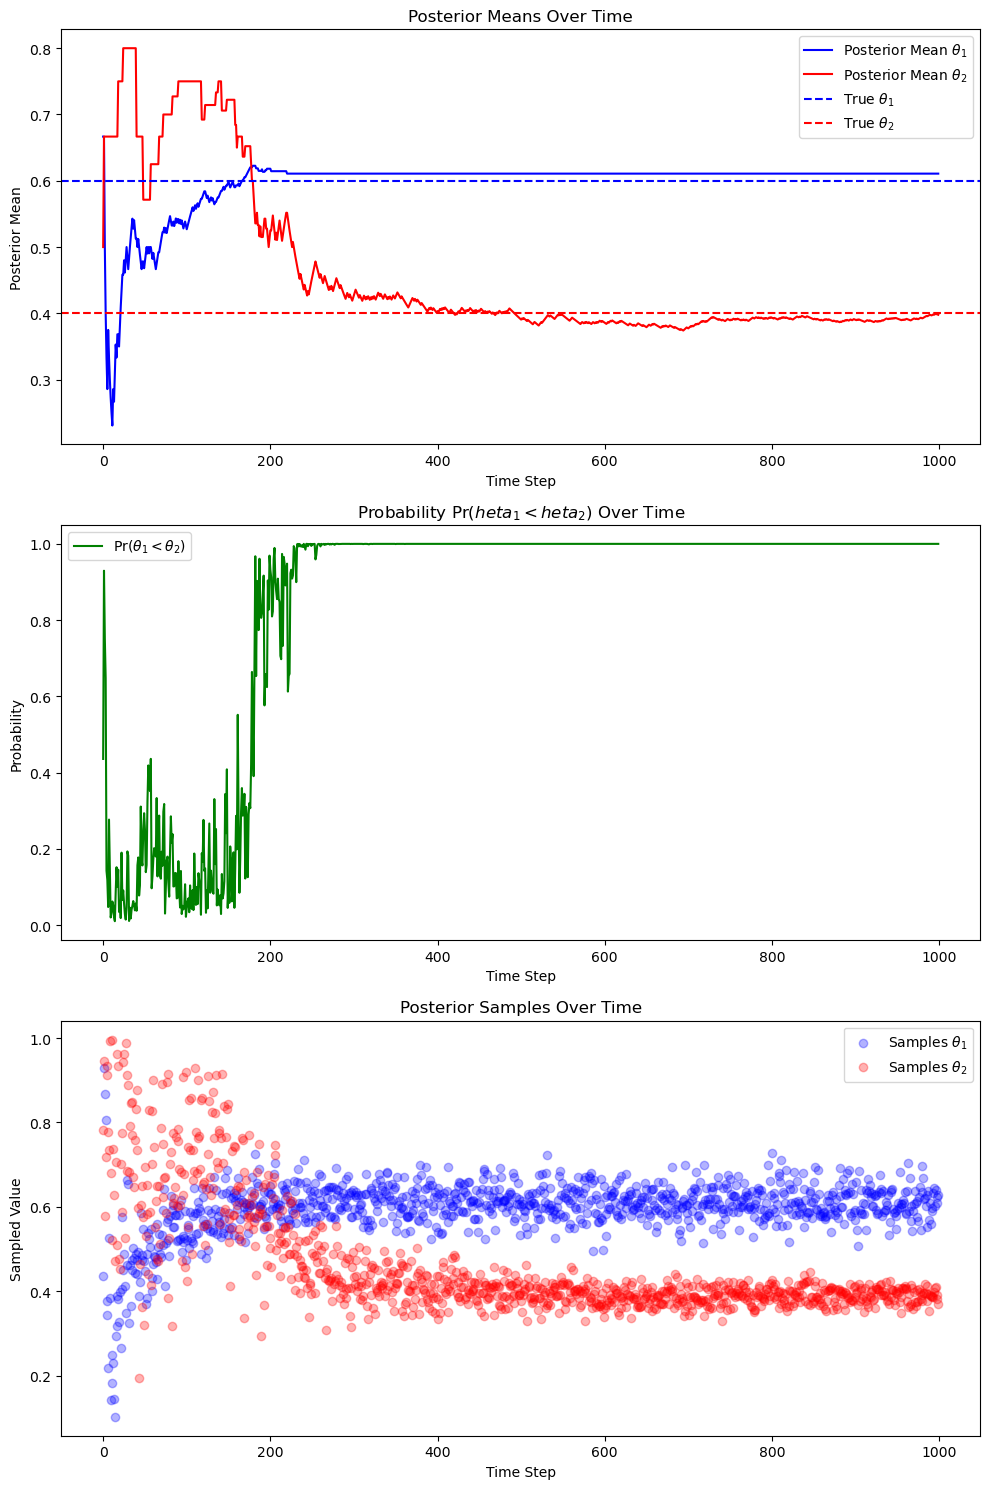

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Step 1: Initialize true parameters for θ1 and θ2
theta1_true = 0.6  # True success probability for arm 1
theta2_true = 0.4  # True success probability for arm 2

# Step 2: Set prior parameters for Beta distributions (α, β)
alpha1, beta1 = 1, 1  # Prior for θ1
alpha2, beta2 = 1, 1  # Prior for θ2

# Step 3: Initialize counts for successes and trials
n1, x1 = 0, 0  # Counts for arm 1
n2, x2 = 0, 0  # Counts for arm 2

# Step 4: Number of iterations (time steps)
m = 1000  # Total number of coin flips

# Step 5: Arrays to store posterior means for visualization
posterior_means_theta1 = []
posterior_means_theta2 = []
theta1_samples = []
theta2_samples = []
prob_theta1_lt_theta2 = []

# Step 6: Bayesian Multi-Armed Bandit Algorithm
for t in range(m):
    # Sample from the posterior distributions of θ1 and θ2
    theta1_sample = np.random.beta(alpha1 + x1, beta1 + n1 - x1)
    theta2_sample = np.random.beta(alpha2 + x2, beta2 + n2 - x2)
    
    # Compute the probability that θ1 < θ2
    prob_theta1_lt = beta.cdf(theta1_sample, alpha2 + x2, beta2 + n2 - x2)
    prob_theta1_lt_theta2.append(prob_theta1_lt)
    
    # Decide which arm to pull based on probability
    if np.random.rand() < prob_theta1_lt:
        # Flip a coin with success probability θ2_true
        flip = np.random.rand() < theta2_true
        n2 += 1
        x2 += flip
    else:
        # Flip a coin with success probability θ1_true
        flip = np.random.rand() < theta1_true
        n1 += 1
        x1 += flip
    
    # Update posterior means for visualization
    posterior_mean_theta1 = (alpha1 + x1) / (alpha1 + beta1 + n1)
    posterior_mean_theta2 = (alpha2 + x2) / (alpha2 + beta2 + n2)
    posterior_means_theta1.append(posterior_mean_theta1)
    posterior_means_theta2.append(posterior_mean_theta2)
    theta1_samples.append(theta1_sample)
    theta2_samples.append(theta2_sample)

# Step 7: Visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot posterior means over time
axes[0].plot(range(m), posterior_means_theta1, label=r'Posterior Mean $\theta_1$', color='blue')
axes[0].plot(range(m), posterior_means_theta2, label=r'Posterior Mean $\theta_2$', color='red')
axes[0].axhline(theta1_true, color='blue', linestyle='--', label=r'True $\theta_1$')
axes[0].axhline(theta2_true, color='red', linestyle='--', label=r'True $\theta_2$')
axes[0].set_title('Posterior Means Over Time')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Posterior Mean')
axes[0].legend()

# Plot probability that θ1 < θ2 over time
axes[1].plot(range(m), prob_theta1_lt_theta2, label=r'Pr($\theta_1 < \theta_2$)', color='green')
axes[1].set_title('Probability Pr($\theta_1 < \theta_2$) Over Time')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Probability')
axes[1].legend()

# Plot samples from the posteriors
axes[2].scatter(range(m), theta1_samples, alpha=0.3, label=r'Samples $\theta_1$', color='blue')
axes[2].scatter(range(m), theta2_samples, alpha=0.3, label=r'Samples $\theta_2$', color='red')
axes[2].set_title('Posterior Samples Over Time')
axes[2].set_xlabel('Time Step')
axes[2].set_ylabel('Sampled Value')
axes[2].legend()

plt.tight_layout()
plt.show()


### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

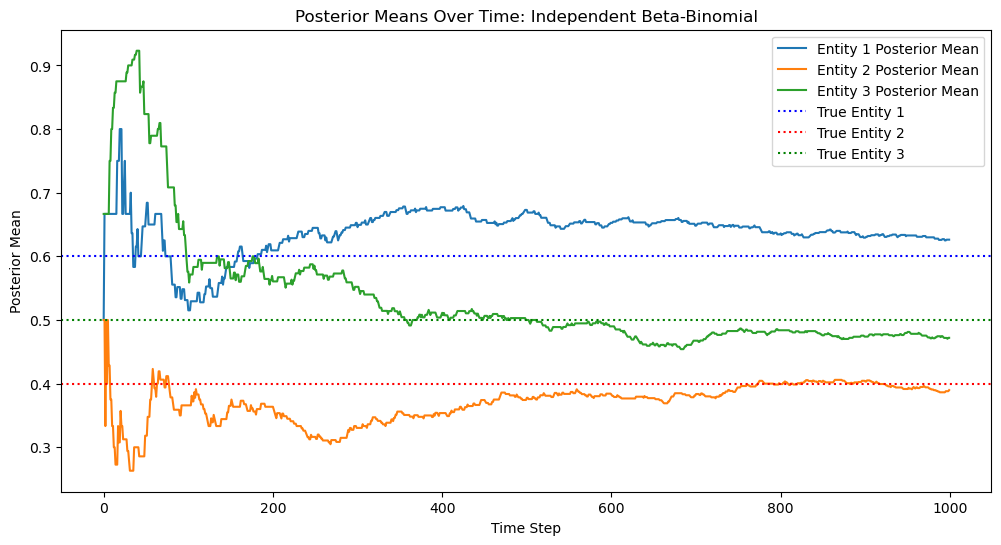

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True success probabilities for three entities
theta_true = [0.6, 0.4, 0.5]

# Initialize priors for each entity
beta_params = [[1, 1], [1, 1], [1, 1]]  # Alpha and Beta for Beta distribution
n = [0, 0, 0]  # Total trials for each entity
x = [0, 0, 0]  # Total successes for each entity

# Number of iterations
m = 1000

# Track posterior means for visualization
posterior_means_independent = [[] for _ in range(3)]

# Simulation for Analysis 1
for t in range(m):
    # Randomly select an entity
    entity_chosen = np.random.choice(3)  # Uniform choice among three entities
    flip = np.random.rand() < theta_true[entity_chosen]  # Flip coin based on true probability
    n[entity_chosen] += 1
    x[entity_chosen] += flip

    # Update posteriors for independent models
    for j in range(3):
        alpha_post = beta_params[j][0] + x[j]
        beta_post = beta_params[j][1] + n[j] - x[j]
        posterior_means_independent[j].append(alpha_post / (alpha_post + beta_post))

# Visualization for Analysis 1
plt.figure(figsize=(12, 6))

for j in range(3):
    plt.plot(range(m), posterior_means_independent[j], label=f'Entity {j+1} Posterior Mean')

plt.axhline(theta_true[0], color='blue', linestyle=':', label='True Entity 1')
plt.axhline(theta_true[1], color='red', linestyle=':', label='True Entity 2')
plt.axhline(theta_true[2], color='green', linestyle=':', label='True Entity 3')

plt.title('Posterior Means Over Time: Independent Beta-Binomial')
plt.xlabel('Time Step')
plt.ylabel('Posterior Mean')
plt.legend()
plt.show()

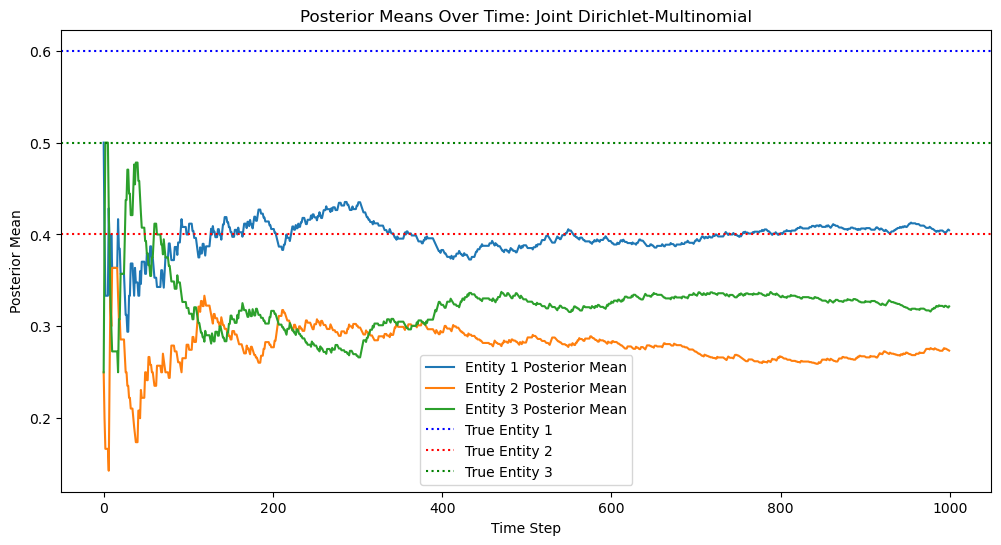

In [3]:
from scipy.stats import dirichlet

# Initialize Dirichlet prior
alpha = [1, 1, 1]  # Dirichlet prior parameters

# Track posterior means for visualization
posterior_means_joint = []

# Simulation for Analysis 2
n = [0, 0, 0]  # Total trials for each entity
x = [0, 0, 0]  # Total successes for each entity

for t in range(m):
    # Randomly select an entity
    entity_chosen = np.random.choice(3)  # Uniform choice among three entities
    flip = np.random.rand() < theta_true[entity_chosen]  # Flip coin based on true probability
    n[entity_chosen] += 1
    x[entity_chosen] += flip

    # Update Dirichlet posterior
    alpha_post_joint = [alpha[j] + x[j] for j in range(3)]
    posterior_mean_joint = np.array(alpha_post_joint) / sum(alpha_post_joint)
    posterior_means_joint.append(posterior_mean_joint)

# Visualization for Analysis 2
posterior_means_joint_array = np.array(posterior_means_joint)
plt.figure(figsize=(12, 6))

for j in range(3):
    plt.plot(range(m), posterior_means_joint_array[:, j], label=f'Entity {j+1} Posterior Mean')

plt.axhline(theta_true[0], color='blue', linestyle=':', label='True Entity 1')
plt.axhline(theta_true[1], color='red', linestyle=':', label='True Entity 2')
plt.axhline(theta_true[2], color='green', linestyle=':', label='True Entity 3')

plt.title('Posterior Means Over Time: Joint Dirichlet-Multinomial')
plt.xlabel('Time Step')
plt.ylabel('Posterior Mean')
plt.legend()
plt.show()


### Discussion

The main difference between the two approaches is that for independent beta-binomial, no information is shared across entities, and posterior means for each entity converge independetly; whereas for dirichlet-multinomial, posterior means fro all entities are influenced by shared prior information. 

In real-world AB testing context, data can be sparse, dirichlet-multinomial can have faster convergence, as it considers the data collectively, leverages shared information and captures interdependencies. 